/home/jonat/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


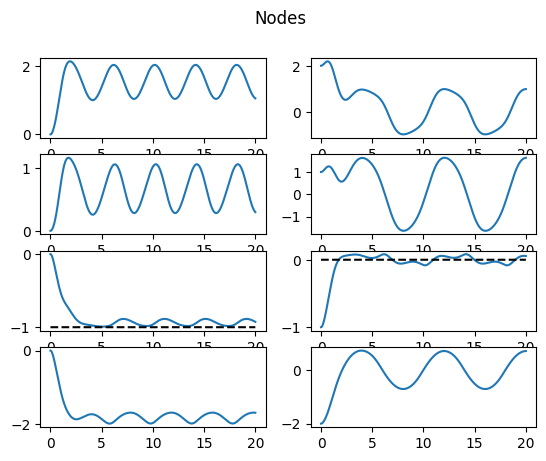

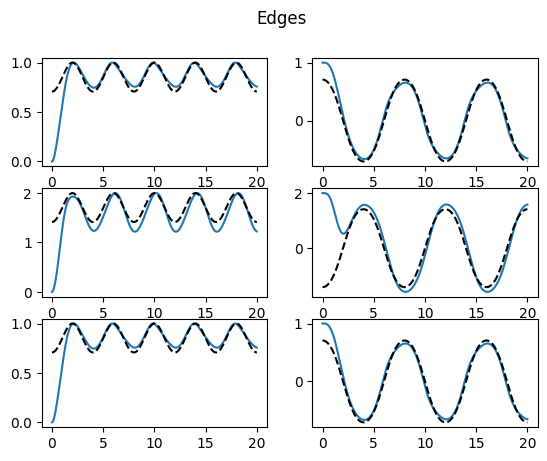

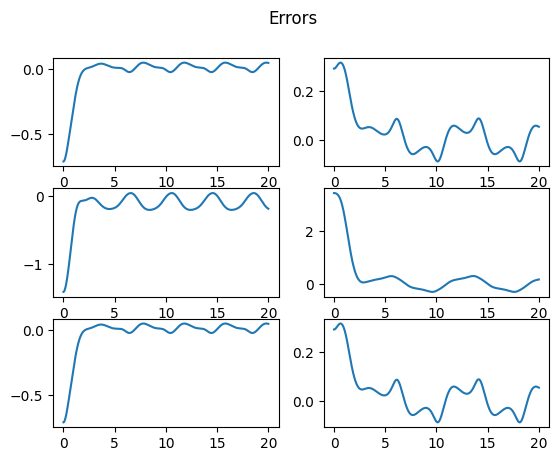

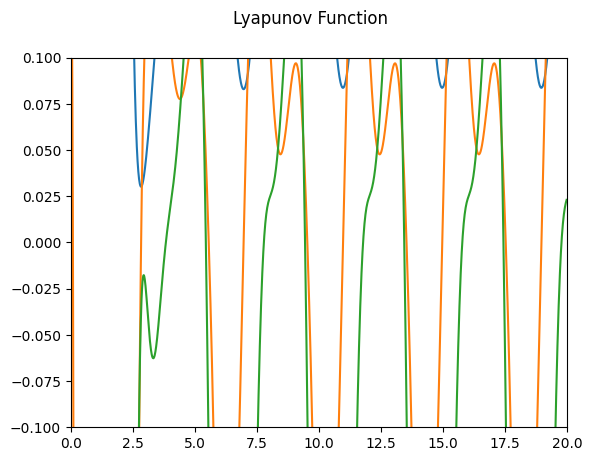

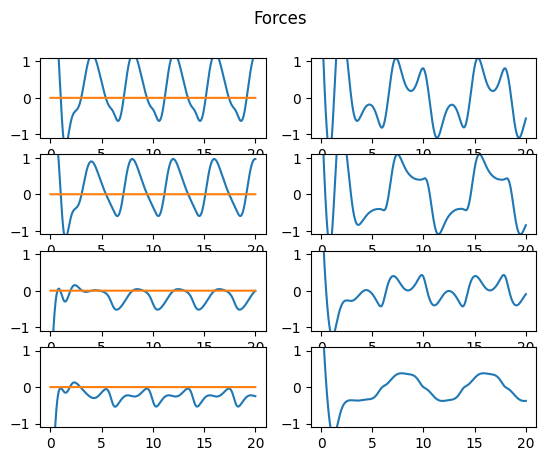

In [1]:
import numpy as np
from network_simulator_v2 import NetworkSimulatorV2

m = np.array([1, 1, 1, 1])
l = np.array([1, 2, 1])
g = 9.81

dt = 0.01
tf = 20
t = np.arange(0, tf, dt)

Q_0 = np.array([[0, 2], [0, 1], [0, -1], [0, -2]])
Q_dot_0 = np.array([[0, 0], [0, 0], [0, 0], [0, 0]])

n = 4
k = 3

D_of_G = np.array([[ 1,  0,  0],
                    [-1,  1,  0],
                    [ 0, -1,  1],
                    [ 0,  0, -1]]) # n x k

kp = 50
kd = 50

theta_d = lambda t: np.pi/4*np.cos(np.pi/4*t)
theta_d_dot = lambda t: -np.pi**2/16*np.sin(np.pi/4*t)
theta_d_ddot = lambda t: -np.pi**3/64*np.cos(np.pi/4*t)
Qe_d = lambda t: np.array([[l[0]*np.cos(theta_d(t)), l[0]*np.sin(theta_d(t))],
                             [l[1]*np.cos(theta_d(t)), -l[1]*np.sin(theta_d(t))],
                             [l[2]*np.cos(theta_d(t)), l[2]*np.sin(theta_d(t))]])
Qe_d_dot = lambda t: np.array([[-l[0]*np.sin(theta_d(t))*theta_d_dot(t), l[0]*np.cos(theta_d(t))*theta_d_dot(t)],
                                [-l[1]*np.sin(theta_d(t))*theta_d_dot(t), -l[1]*np.cos(theta_d(t))*theta_d_dot(t)],
                                [-l[2]*np.sin(theta_d(t))*theta_d_dot(t), l[2]*np.cos(theta_d(t))*theta_d_dot(t)]])
Qe_d_ddot = lambda t: np.array([[-l[0]*np.cos(theta_d(t))*theta_d_dot(t)**2 - l[0]*np.sin(theta_d(t))*theta_d_ddot(t), -l[0]*np.sin(theta_d(t))*theta_d_dot(t)**2 + l[0]*np.cos(theta_d(t))*theta_d_ddot(t)],
                                [-l[1]*np.cos(theta_d(t))*theta_d_dot(t)**2 - l[1]*np.sin(theta_d(t))*theta_d_ddot(t), -l[1]*np.sin(theta_d(t))*theta_d_dot(t)**2 + l[1]*np.cos(theta_d(t))*theta_d_ddot(t)],
                                [-l[2]*np.cos(theta_d(t))*theta_d_dot(t)**2 - l[2]*np.sin(theta_d(t))*theta_d_ddot(t), -l[2]*np.sin(theta_d(t))*theta_d_dot(t)**2 + l[2]*np.cos(theta_d(t))*theta_d_ddot(t)]])

i_leader = 2
r_leader_d = lambda t: np.array([-1, 0])
r_leader_d_dot = lambda t: np.array([0, 0])
r_leader_d_ddot = lambda t: np.array([0, 0])

sim = NetworkSimulatorV2(n, k, m, l, g, D_of_G, dt, tf, Q_0, Q_dot_0, i_leader, r_leader_d, r_leader_d_dot, r_leader_d_ddot, Qe_d, Qe_d_dot, Qe_d_ddot, kp, kd)
sim.run()
sim.generate_plots()
# sim.generate_animation("3-link", ((-3, 3), (-3, 3)))